In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

data = pd.read_csv('Money.csv')

In [26]:
#V1. variance of Wavelet Transformed image (continuous)
#V2. skewness of Wavelet Transformed image (continuous)
#V3. curtosis of Wavelet Transformed image (continuous)
#V4. entropy of image (continuous)
#Class (target). Presumably 1 for genuine and 2 for forged

v1 = data['V1']
v2 = data['V2']
v3 = data['V3']
v4 = data['V4']

#Normalised Data

v1_min = np.min(v1,0)
v1_max = np.max(v1,0)

v2_min = np.min(v2,0)
v2_max = np.max(v2,0)

v3_min = np.min(v3,0)
v3_max = np.max(v3,0)

v4_min = np.min(v4,0)
v4_max = np.max(v4,0)

NV1 = (v1 - v1_min) / (v1_max - v1_min)
NV2 = (v2 - v2_min) / (v2_max - v2_min)
NV3 = (v3 - v3_min) / (v3_max - v3_min)
NV4 = (v4 - v4_min) / (v4_max - v4_min)

In [27]:
#Means

meanV1 = np.mean(NV1,0)
meanV2 = np.mean(NV2,0)
meanV3 = np.mean(NV3,0)
meanV4 = np.mean(NV4,0)

#Variance

varV1 = np.var(NV1)
varV2 = np.var(NV2)
varV3 = np.var(NV3)
varV4 = np.var(NV4)

#Standard deviation
std_v1 = np.std(NV1,0)
std_v2 = np.std(NV2,0)
std_v3 = np.std(NV3,0)
std_v4 = np.std(NV4,0)

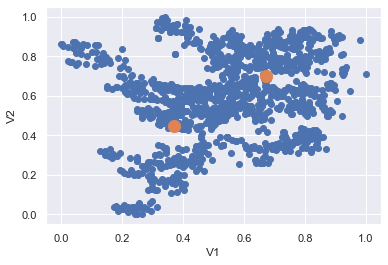

In [32]:
plt.xlabel('V1')
plt.ylabel('V2')
plt.scatter(NV1,NV2)

Kmeans = np.column_stack((NV1,NV2))
                             
km_res = KMeans(n_clusters=2).fit(Kmeans)

clusters = km_res.cluster_centers_


plt.scatter(clusters[:,0],clusters[:,1], s=150)

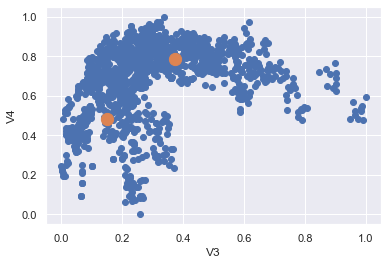

In [29]:
plt.scatter(NV3,NV4)
plt.xlabel('V3')
plt.ylabel('V4')

Kmeans = np.column_stack((NV3,NV4))
                             
km_res = KMeans(n_clusters=2).fit(Kmeans)

clusters = km_res.cluster_centers_

plt.scatter(clusters[:,0],clusters[:,1], s=150)

0    765
1    607
Name: kmean1, dtype: int64

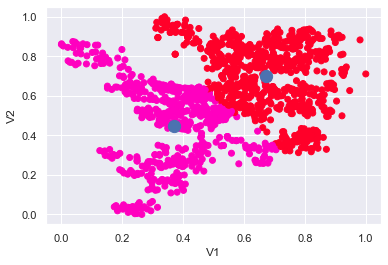

In [33]:
#First Kmeans

V1eV2 = np.column_stack((NV1, NV2))
km_res = KMeans(n_clusters = 2).fit(V1eV2)
clusters = km_res.cluster_centers_
K_means = km_res.predict(V1eV2)

plt.scatter(NV1, NV2, c=K_means,cmap='gist_rainbow')
plt.scatter(clusters[:,0], clusters[:,1], s = 150)
plt.xlabel('V1')
plt.ylabel('V2')

data['kmean1'] = km_res.labels_
data['kmean1'].value_counts()

1    851
0    521
Name: kmean2, dtype: int64

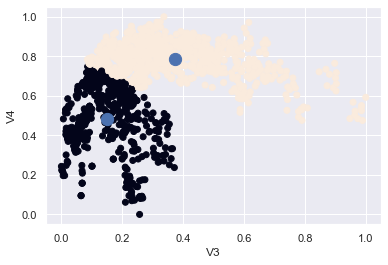

In [39]:
#Seconds Kmeans

V3eV4 = np.column_stack((NV3, NV4))
km_res = KMeans(n_clusters = 2, n_init = 50).fit(V3eV4)
clusters = km_res.cluster_centers_
K_means = km_res.predict(V3eV4)


plt.scatter(NV3, NV4, c=K_means)
plt.scatter(clusters[:,0], clusters[:,1], s = 150)
plt.xlabel('V3')
plt.ylabel('V4')

data['kmean2'] = km_res.labels_
data['kmean2'].value_counts()

In [40]:
data

,V1,V2,V3,V4,Class,kmean1,kmean2
0,3.62160,8.66610,-2.8073,-0.44699,1,0,0
1,4.54590,8.16740,-2.4586,-1.46210,1,0,0
2,3.86600,-2.63830,1.9242,0.10645,1,0,1
3,3.45660,9.52280,-4.0112,-3.59440,1,0,0
4,0.32924,-4.45520,4.5718,-0.98880,1,1,1
...,...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2,0,1
1368,-1.38870,-4.87730,6.4774,0.34179,2,1,1
1369,-3.75030,-13.45860,17.5932,-2.77710,2,1,1
1370,-3.56370,-8.38270,12.3930,-1.28230,2,1,1


In [43]:
print('Média')
print(meanV1)
print(meanV2)
print(meanV3)
print(meanV4)
print('\n')
print('Variancia')
print(varV1)
print(varV2)
print(varV3)
print(varV4)
print('\n')
print('Desvio Padrão')
print(std_v1)
print(std_v2)
print(std_v3)
print(std_v4)

Média
0.5391136632764807
0.5873013774145737
0.2879241439945754
0.6689165442649803


Variancia
0.04199579026616071
0.048193981085586556
0.03444789558369441
0.03647011576677358


Desvio Padrão
0.20492874436291436
0.21953127587108529
0.18560144283839608
0.1909715051173174
